<AxesSubplot:xlabel='carat', ylabel='price'>

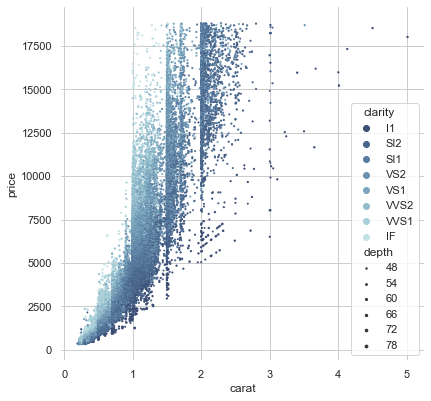

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

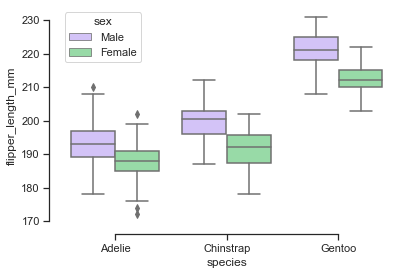

In [2]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
penguins = sns.load_dataset("penguins")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="species", y="flipper_length_mm",
            hue="sex", palette=["m", "g"],
            data=penguins)
sns.despine(offset=10, trim=True)

In [3]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
taxis = sns.load_dataset("taxis")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=taxis, x="color", y="passengers",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

KeyError: 'yellow'

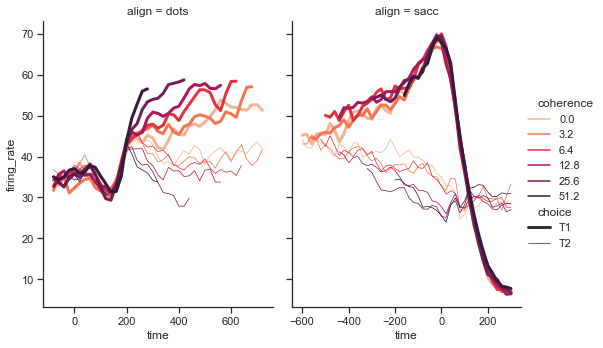

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

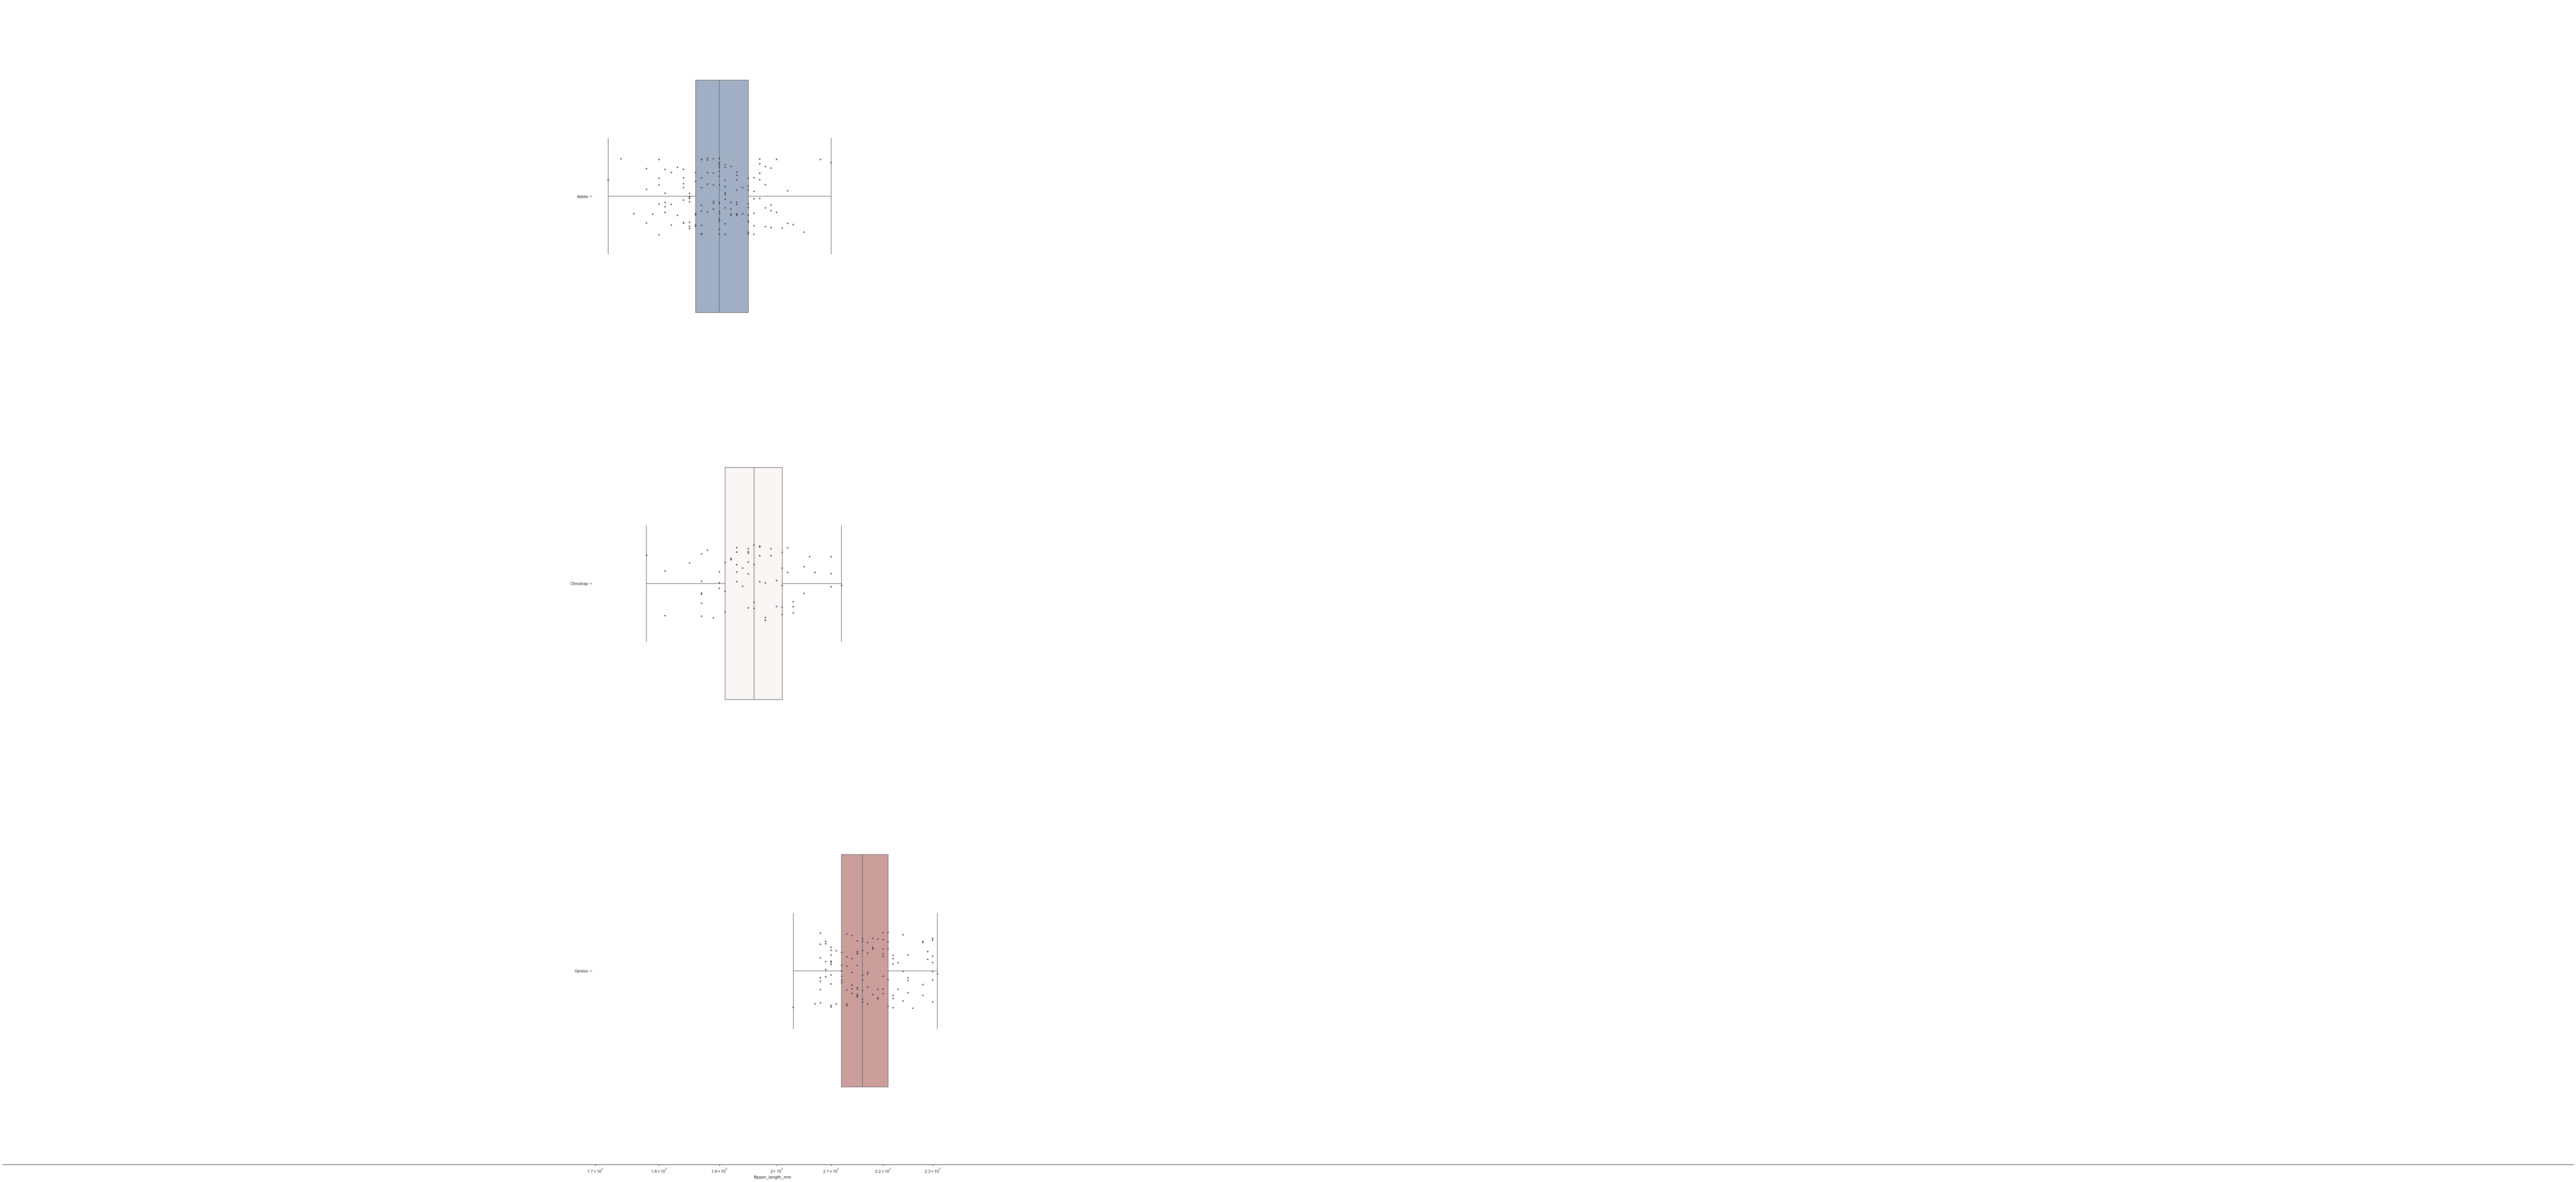

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(17, 56))
ax.set_xscale("log")

# Load the example planets dataset
penguins = sns.load_dataset("penguins")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="flipper_length_mm", y="species", data=penguins,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="flipper_length_mm", y="species", data=penguins,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

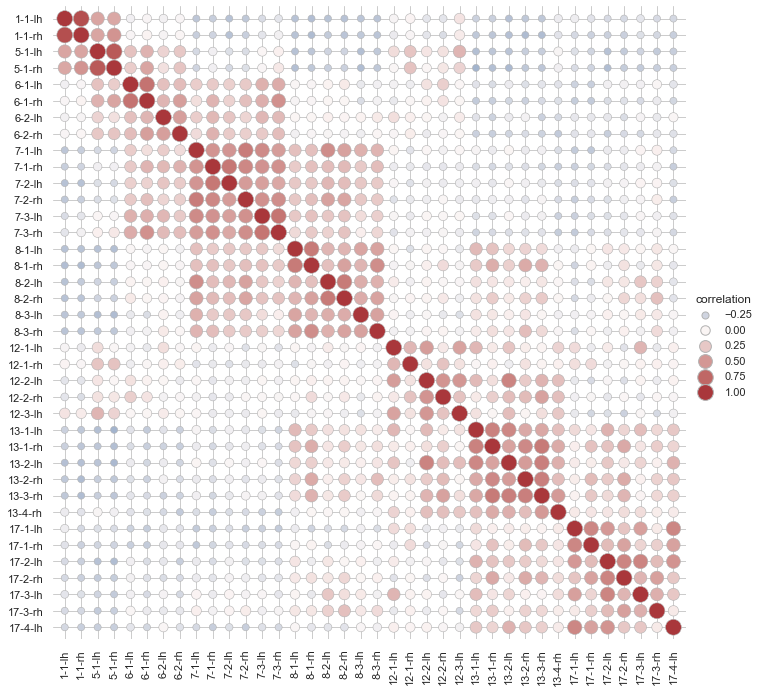

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

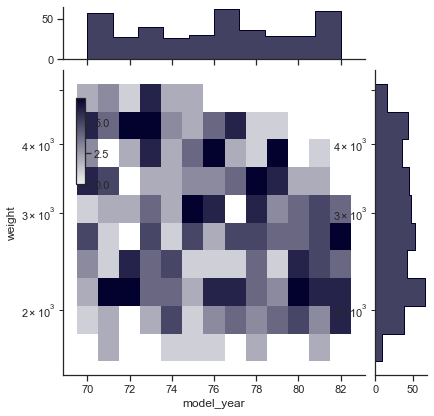

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
mpg = sns.load_dataset("mpg")
g = sns.JointGrid(data=mpg, x="model_year", y="weight", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

<AxesSubplot:xlabel='origin', ylabel='weight'>

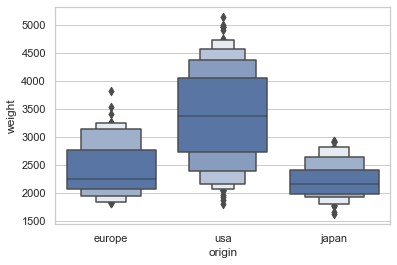

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

mpg = sns.load_dataset("mpg")
clarity_ranking = ["europe", "usa", "japan"]

sns.boxenplot(x="origin", y="weight",
              color="b", order=clarity_ranking,
              scale="linear", data=mpg)

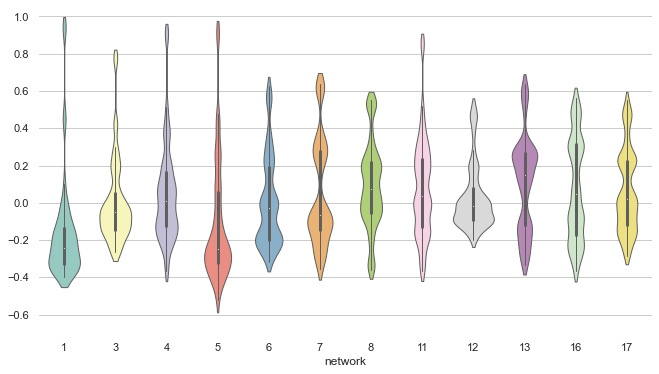

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

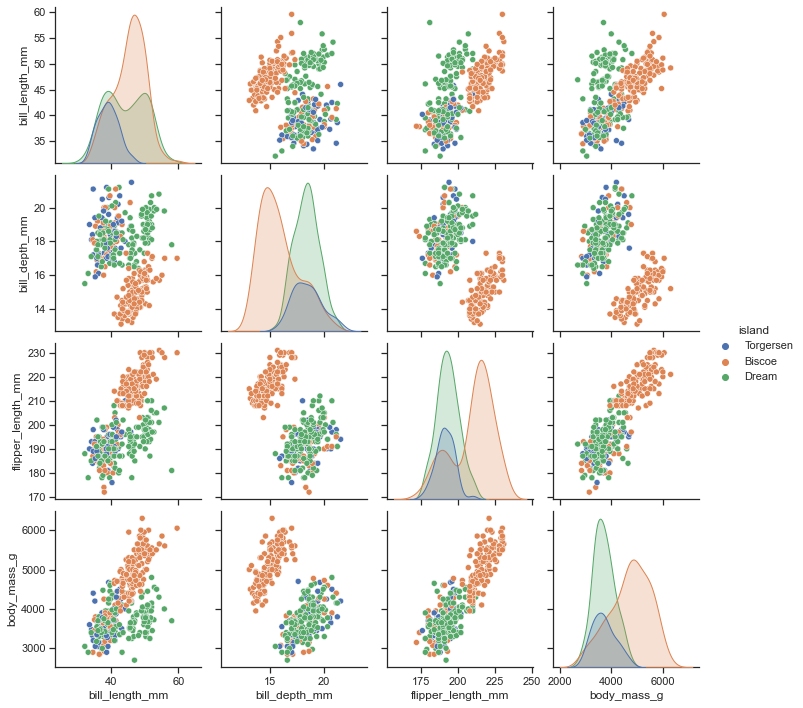

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="island")

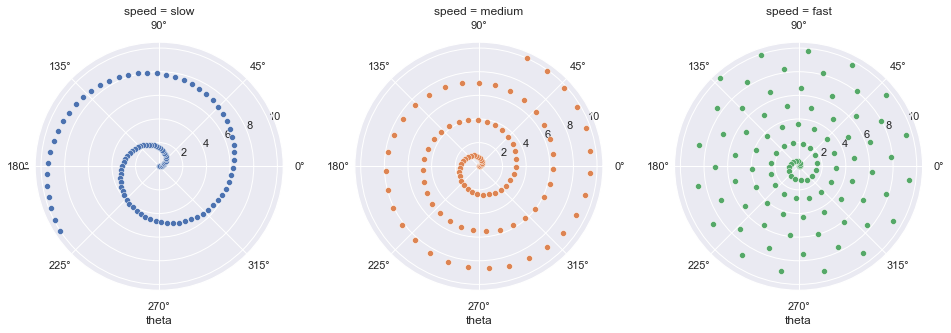

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")

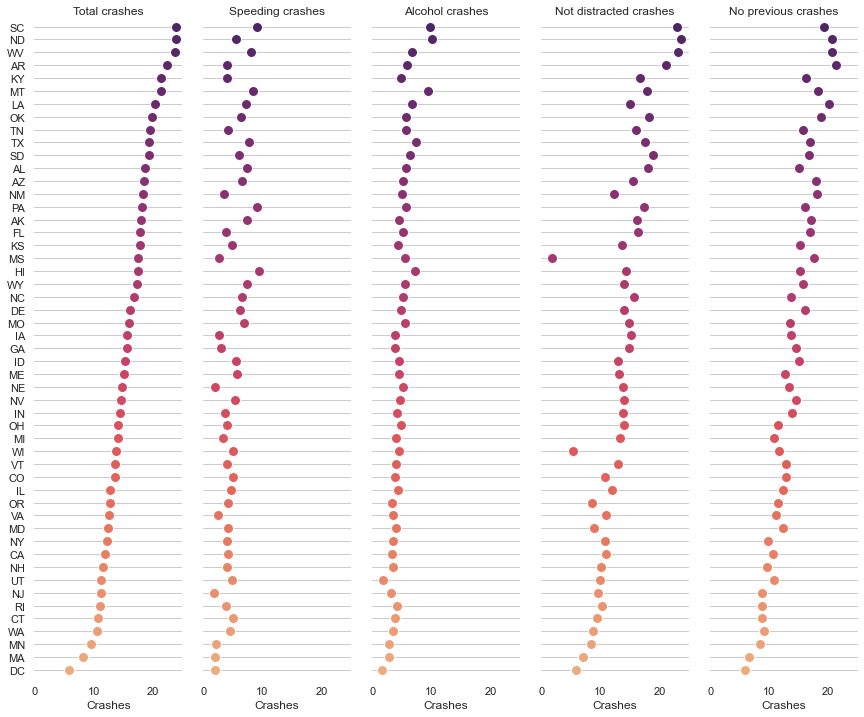

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                 x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

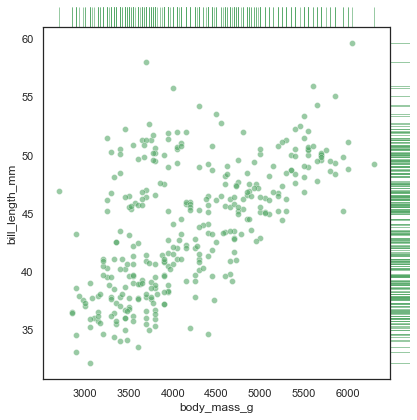

In [7]:
import seaborn as sns
sns.set_theme(style="white", color_codes=True)
penguins = sns.load_dataset("penguins")

# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=penguins, x="body_mass_g", y="bill_length_mm", space=0, ratio=17)
g.plot_joint(sns.scatterplot, # size=mpg["flipper_length_mm"], 
             sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

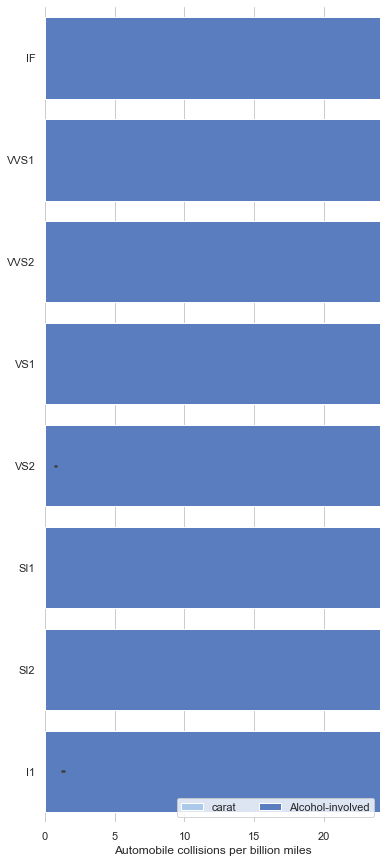

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
diamonds = sns.load_dataset("diamonds").sort_values("price", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="carat", y="clarity", data=diamonds,
            label="carat", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="depth", y="clarity", data=diamonds,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

<AxesSubplot:xlabel='age', ylabel='fare'>

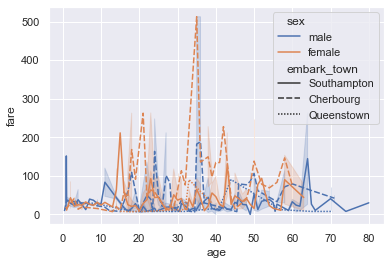

In [2]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
titanic = sns.load_dataset("titanic")

# Plot the responses for different events and regions
sns.lineplot(x="age", y="fare",
             hue="sex", style="embark_town",
             data=titanic)

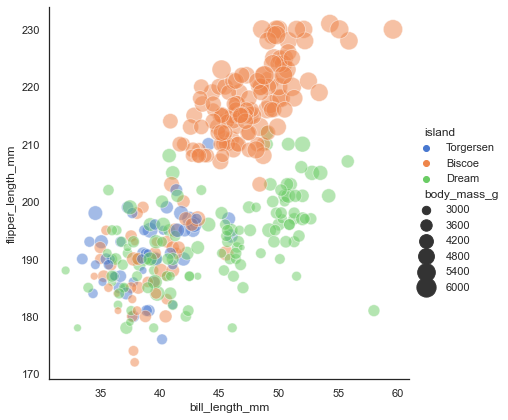

In [4]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
penguins = sns.load_dataset("penguins")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="bill_length_mm", y="flipper_length_mm", hue="island", size="body_mass_g",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=penguins)

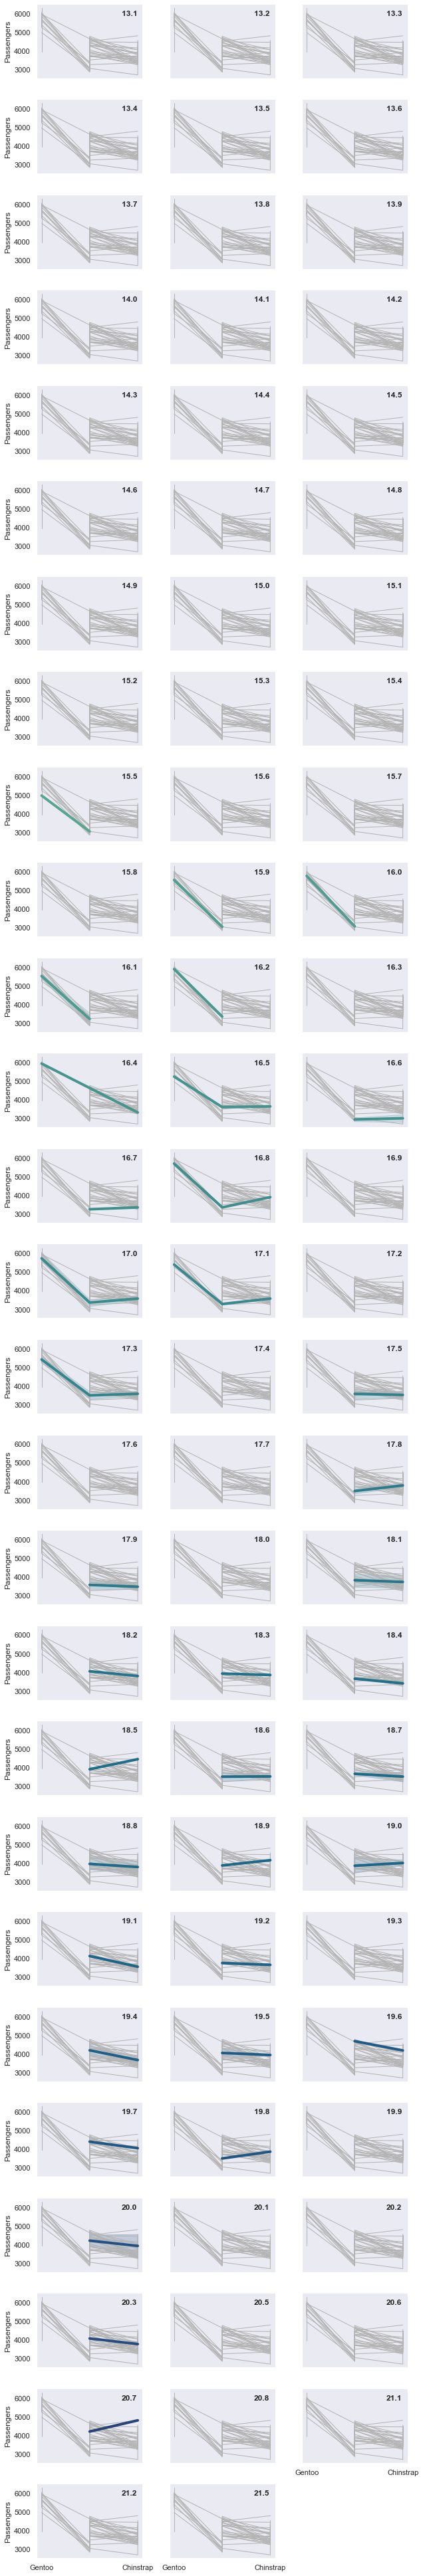

In [7]:
import seaborn as sns

sns.set_theme(style="dark")
penguins = sns.load_dataset("penguins")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=penguins,
    x="species", y="body_mass_g", col="bill_depth_mm", hue="bill_depth_mm",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=penguins, x="species", y="body_mass_g", units="bill_depth_mm",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

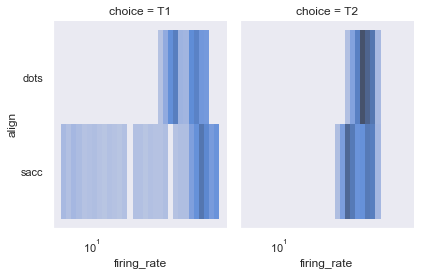

In [9]:
import seaborn as sns
sns.set_theme(style="dark")

dots = sns.load_dataset("dots")
sns.displot(
    data=dots, x="firing_rate", y="align", col="choice",
    log_scale=(True, False), col_wrap=4, height=4, aspect=.7,
)

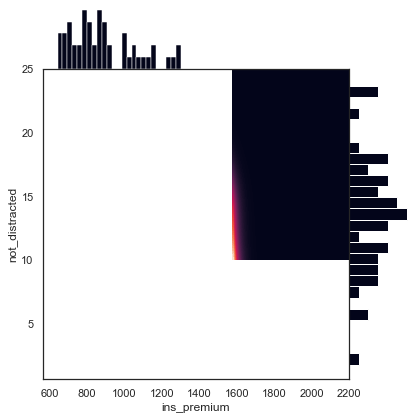

In [11]:
import seaborn as sns
sns.set_theme(style="white")

car = sns.load_dataset("car_crashes")

g = sns.JointGrid(data=car, x="ins_premium", y="not_distracted", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

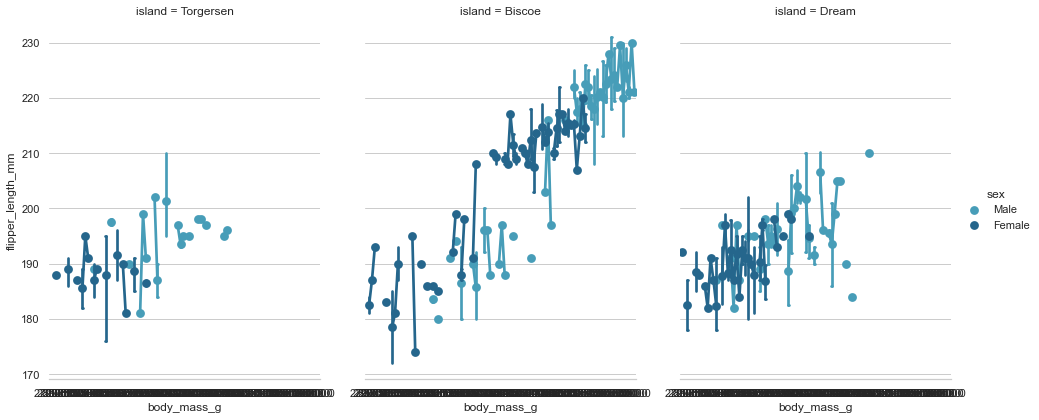

In [13]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example exercise dataset
penguins = sns.load_dataset("penguins")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="body_mass_g", y="flipper_length_mm", hue="sex", col="island",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=penguins)
g.despine(left=True)